# Studying the Star Wars Survey

In [1]:
import pandas as pd
pd.options.display.max_columns = 50
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
print(star_wars.columns)
print(star_wars.shape)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [3]:
print(star_wars.head(10))

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0           NaN                                           Response             
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             
5  3.292731e+09                                                Yes             
6  3.292719e+09                                                Yes             
7  3.292685e+09                                                Yes             
8  3.292664e+09                                                Yes             
9  3.292654e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           

Lets remove any Respondent ID that are Nan

In [4]:
not_null_filter = star_wars["RespondentID"].notnull()
star_wars = star_wars[not_null_filter]
#Add a check to see it all worked
print(star_wars["RespondentID"].isnull().sum())

0


### Converting Yes/No responses to True/False 

In [5]:
yes_no = {"Yes":True, "No":False}
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no).inplace=True

In [6]:
print(star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False))

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64


In [7]:
yes_no = {"Yes":True, "No":False}
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no).inplace=True
print(star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False))

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


### Correcting column names and Converting the films seen into True/False.

In [8]:
film_columns = star_wars.columns[3:9]

In [9]:
star_wars[film_columns].apply(pd.value_counts)

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
Star Wars: Episode I The Phantom Menace,673.0,NaN,NaN,NaN,NaN,NaN
Star Wars: Episode II Attack of the Clones,NaN,571.0,NaN,NaN,NaN,NaN
Star Wars: Episode III Revenge of the Sith,NaN,NaN,550.0,NaN,NaN,NaN
Star Wars: Episode IV A New Hope,NaN,NaN,NaN,607.0,NaN,NaN
Star Wars: Episode V The Empire Strikes Back,NaN,NaN,NaN,NaN,758.0,NaN
Star Wars: Episode VI Return of the Jedi,NaN,NaN,NaN,NaN,NaN,738.0


In [10]:
#The films have different numbers of spaces in the names!
star_wars[film_columns].apply(set).tolist()

[{nan, 'Star Wars: Episode I  The Phantom Menace'},
 {nan, 'Star Wars: Episode II  Attack of the Clones'},
 {nan, 'Star Wars: Episode III  Revenge of the Sith'},
 {nan, 'Star Wars: Episode IV  A New Hope'},
 {nan, 'Star Wars: Episode V The Empire Strikes Back'},
 {nan, 'Star Wars: Episode VI Return of the Jedi'}]

In [11]:
print(star_wars.columns[3:9])

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')


In [12]:
film_rename = {'Which of the following Star Wars films have you seen? Please select all that apply.' : "seen_1" , 'Unnamed: 4': "seen_2", 'Unnamed: 5': "seen_3",
'Unnamed: 6': "seen_4", 'Unnamed: 7': "seen_5", 'Unnamed: 8': "seen_6"}
star_wars.rename(columns= film_rename, inplace= True)

In [13]:
star_wars.columns[3:9].tolist()

['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']

Next to convert the film name responses to True and False

In [14]:
first_row = star_wars.iloc[0:1,:]
movie_names = list(first_row.iloc[0,3:9])
print(movie_names)

['Star Wars: Episode I  The Phantom Menace', 'Star Wars: Episode II  Attack of the Clones', 'Star Wars: Episode III  Revenge of the Sith', 'Star Wars: Episode IV  A New Hope', 'Star Wars: Episode V The Empire Strikes Back', 'Star Wars: Episode VI Return of the Jedi']


In [15]:
def response_replace(movie):
    if movie in movie_names:
        return True
    else:
        return False
star_wars.iloc[:,3:9] = star_wars.iloc[:,3:9].applymap(response_replace)

In [16]:
#check it worked. 
# print(star_wars.iloc[:,3:9].apply(value_counts(dropna=False)))
star_wars.iloc[:,3:9].apply(pd.value_counts)

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
False,513,615,636,579,428,448
True,673,571,550,607,758,738


Next to convert the questions about rankings into numerical values

In [17]:
#Display the questions
print(list(star_wars.iloc[0:1, 9:15]))
print(star_wars.iloc[:, 9:15].head(5))

['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14']
  Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.  \
1                                                  3                                                                                              
2                                                NaN                                                                                              
3                                                  1                                                                                              
4                                                  5                                                                                              
5                                           

In [18]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [19]:
filmrank_rename = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':"ranking_1", 'Unnamed: 10':"ranking_2", 'Unnamed: 11':"ranking_3", 'Unnamed: 12':"ranking_4", 'Unnamed: 13':"ranking_5", 'Unnamed: 14':"ranking_6"}
star_wars.rename(columns= filmrank_rename, inplace= True)
#Check to see it worked
print(list(star_wars.iloc[0:1, 9:15]))

['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6']


In [20]:
ranked_films = star_wars.iloc[:,9:15].mean().sort_values(ascending = False)

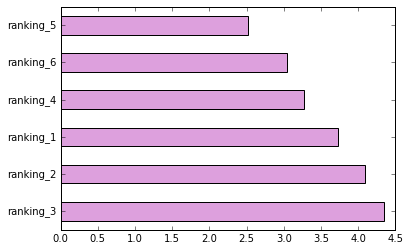

In [21]:
%matplotlib inline
plt = ranked_films.plot.barh(color='plum')

Lower values here are better. 
Starwars Episode 5 is the best ranked film
Starwars Episode 3 is the worst ranked film.

Furthermore the 'original 3' (which are episodes 4,5,6) are better than the sequels (episodes 1,2,3) and suggests improvements in technology alone are no measure of a films popularity.

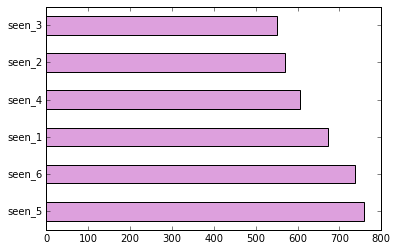

In [22]:
seen_films = star_wars.iloc[:,3:9].sum().sort_values(ascending = False)
seen_films.plot.barh(color='plum')         #plotting a barh chart of how many have seen each film

This gives interesting results.
There are certain trends we might expect in a movie series:

1) A normal trend is for sequels is their quality deminishes. Often the writing is created for the first film and only if it is popular is another made. The public is aware of this trend and often viewership can decrease. Episode 4 was the first created though so this data doesnt support this trend. 

2) Advancements in technology and in human psychology can lead to a more popular current film. Silent films are of a bygone era for a reason. This leap would be expected from episode 4 to episode 3. There is a 3 year gap in episodes 4,5,6 but a 16 year gap from 4 to 3.

3) Often the more people watch the film the more highly rated it is. This is more of a consequence of word of mouth propogation and positive film reviews than a direct consequence. We see this effect here with episode 5 being the most watched film and ranked the best. For the rest of the films this effect is consistent with the reverse seen for episode 1 and 4.

In [23]:
print(star_wars.iloc[:,[2,-6,-5]].columns)

Index(['Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender'],
      dtype='object')


In [24]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

## Male Respondents

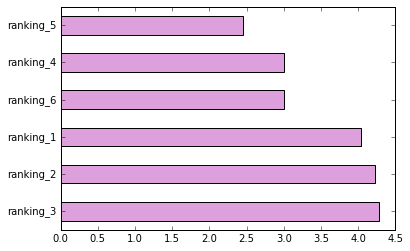

In [25]:
male_ranked_films = males.iloc[:,9:15].mean().sort_values(ascending = False)
male_ranked_films.plot.barh(color='plum')

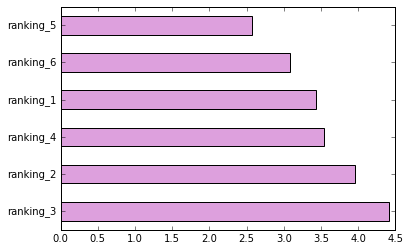

In [26]:
female_ranked_films = females.iloc[:,9:15].mean().sort_values(ascending = False)
female_ranked_films.plot.barh(color='plum')

Both genders rate episode 5 as the top film, 3 the lowest and 2 as second from lowest.
Males vote episode 4 in second place but females vote it as 4th place.
Perhaps there are elements of these films that are more appealing to a particular gender.

## Female & Male seen responses

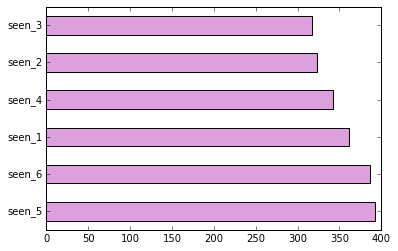

In [27]:
male_seen_films = males.iloc[:,3:9].sum().sort_values(ascending = False)
male_seen_films.plot.barh(color='plum')         #plotting a barh chart of how many have seen each film

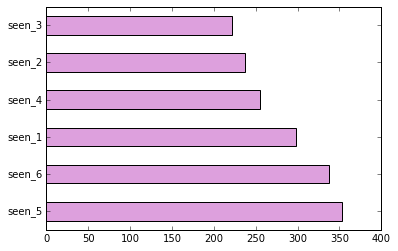

In [28]:
female_seen_films = females.iloc[:,3:9].sum().sort_values(ascending = False)
female_seen_films.plot.barh(color='plum')#plotting a barh chart of how many have seen each film

The popularity trend is the same for male and female.

## Exploring education of respondents

In [29]:
star_wars["Education"].fillna(value="Unknown", inplace=True)
star_wars["Education"].value_counts(dropna = False)

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
Unknown                             150
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

In [30]:
education = star_wars.groupby(by=["Education"])

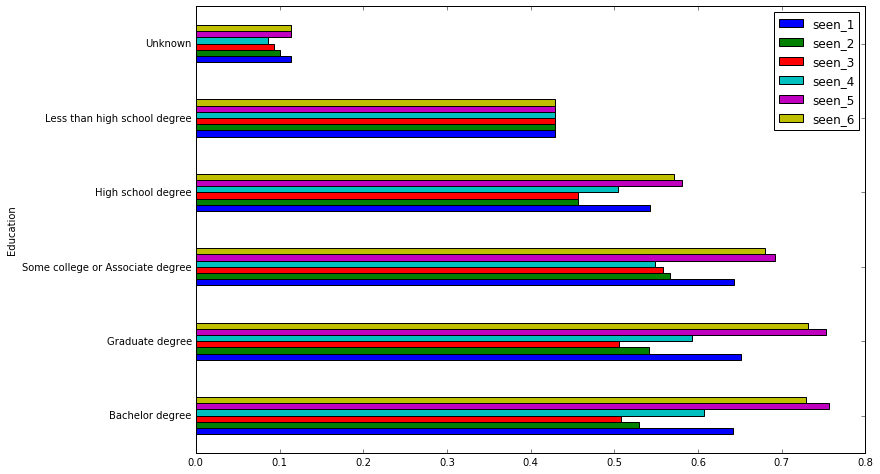

In [31]:
import numpy as np
seen_group = education.aggregate(np.mean).sort_values("seen_5", ascending = False).iloc[:,1:7]
seen_group.plot.barh(figsize=(12,8))

In the above graph we have sorted by most seen for Episdode 5 (the most popular film). It is very interesting to see that less than high school degree shows the same viewership on average for all 6 films. Could it be that these respondents are younger and less interested in the older films or could it be higher educated people prefer the films.
A similar trend (and averages) is seen in the graduate and bachelor degree levels suggesting education at a university level has no impact.
Unknown category shows disproportionately low viewership

In [32]:
star_wars[star_wars["Education"] == "Unknown"].iloc[:,3:9].describe(include='all')

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
count,150,150,150,150,150,150
unique,2,2,2,2,2,2
top,False,False,False,False,False,False
freq,133,135,136,137,133,133


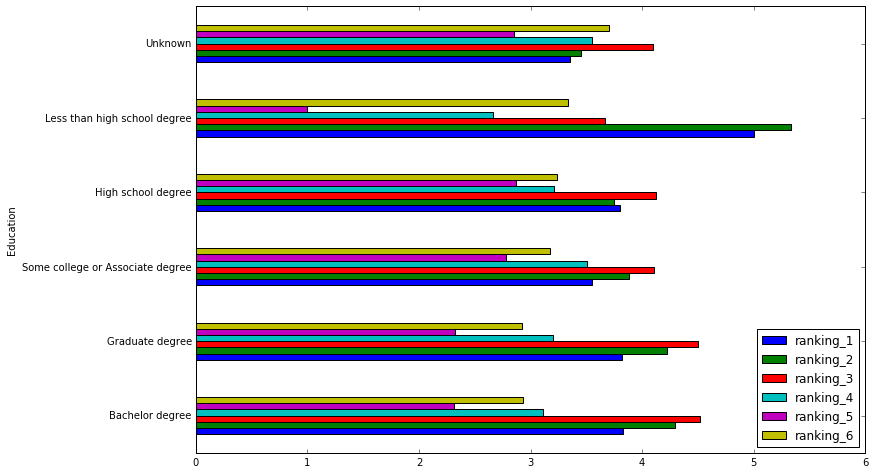

In [43]:
ranking_group = education.aggregate(np.mean).sort_values("seen_5", ascending = False).iloc[:,-6:]
ranking_group.plot.barh(figsize=(12,8))

Lower numbers implies a better opinion of the film.
People with less than a high school degree show episode 5 disproportionately as the favourite film. Episode 3 is is ranked third which is strange considering all other demographics show that this is the worst ranked film.

## Exploring locations

In [37]:
region = star_wars.groupby(by="Location (Census Region)")

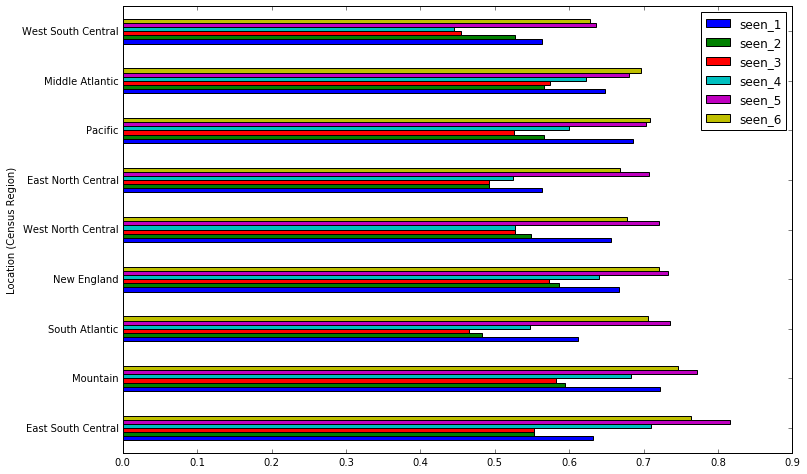

In [40]:
region_seen_group = region.aggregate(np.mean).sort_values("seen_5", ascending = False).iloc[:,1:7]
region_seen_group.plot.barh(figsize=(12,8))

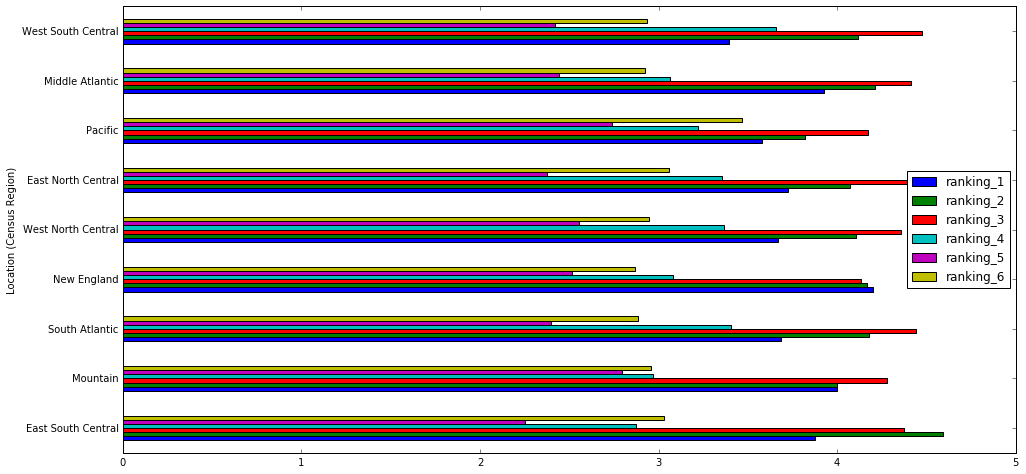

In [46]:
region_ranking_group = region.aggregate(np.mean).sort_values("seen_5", ascending = False).iloc[:,-6:]
region_ranking_group.plot.barh(figsize=(16,8))

The trends in which films have been seen is broadly the same for each region group. The trends are also broadly similar in the rankings. New England shows similar rankings for episode 1,2,3 which is more dispersed amongst other regions.

## Exploring which character shot first

In [55]:
star_wars["Which character shot first?"].value_counts()

Han                                 325
I don't understand this question    306
Greedo                              197
Name: Which character shot first?, dtype: int64

Explicity this should have only one answer from the films.
Interestingly it seems this could have both answers as true.
Orginally versions of the film showed Han shot first.
Later ones were edited by George Lucas to show Greedo shooting first to give Han a self defense context.
The answers here probably reflect on the time the person saw the film.